# **Problem Statement**

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df=pd.read_csv('/content/drive/MyDrive/AlmaBetterCapstoneProjects/UnsupervisedML(Netflix Movies Clustering)/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [34]:
# the following peice of code gives us the first five rows of the observation.
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [35]:
# Lets see the last five observations of the dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [36]:
# Let's see the number of rows and number of columns in our dataset.
df.shape

(7787, 12)

In [37]:
# Let's see some statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


#### We have only one row because there is only one feature that consists of the numerical values . 

In [38]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### Let's see if there are any NULL Values in pur dataset:

In [39]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

#### So, There are a quite a few Null values in the features 'Director' and 'cast'

### Let's check for any Duplicate Values:

In [40]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7782    False
7783    False
7784    False
7785    False
7786    False
Length: 7787, dtype: bool

In [41]:
df.duplicated().sum()

0

#### Thankfully there are no Duplicate Values!!.

In [42]:
df=df.dropna()

In [43]:
ne=pd.read_csv('/content/drive/MyDrive/AlmaBetterCapstoneProjects/UnsupervisedML(Netflix Movies Clustering)/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Date Time Formatting

In [44]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['year_added'].astype(int);
df['day_added'].astype(int);

## Let's start Visualizations

### Let's plot number of Movies and TV shows

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Type')

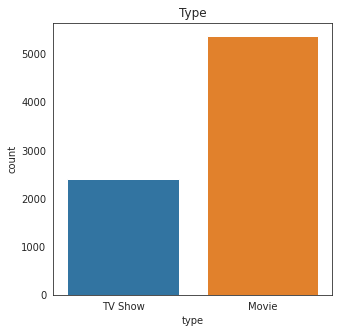

In [45]:
sns.countplot(ne['type'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Type')

### Frequency of different ratings

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rating')

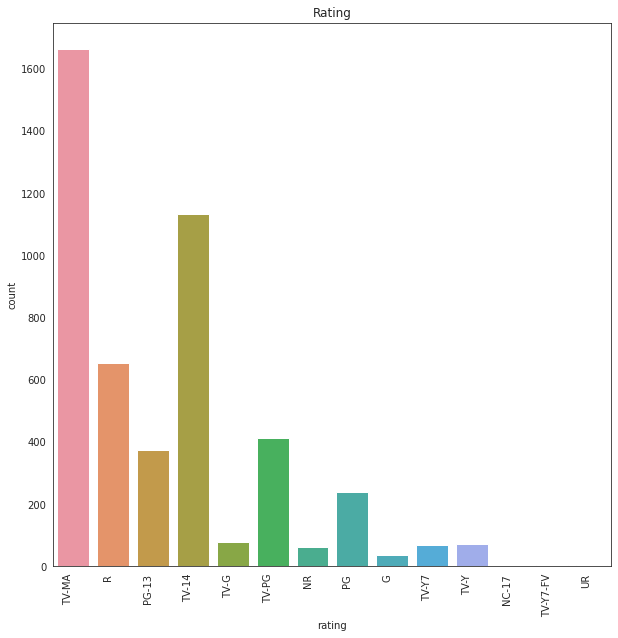

In [46]:
sns.countplot(df['rating'])
sns.countplot(df['rating']).set_xticklabels(sns.countplot(df['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Rating')

### Relation between Type and Rating

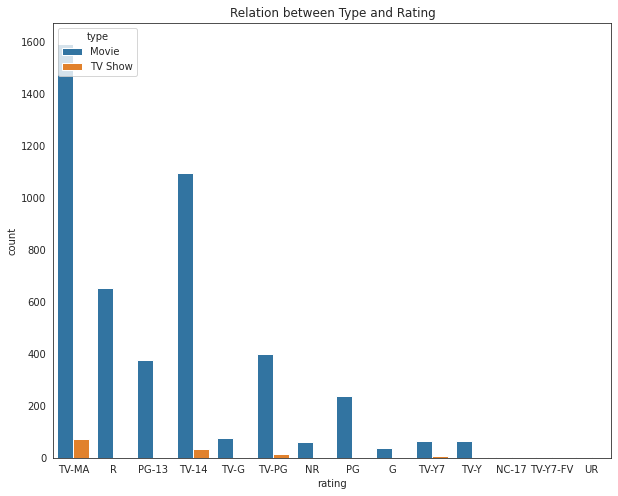

In [47]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('Relation between Type and Rating')
plt.show()

### Pie chart showing distribution of movies and TV Shows

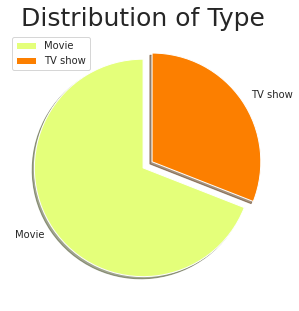

In [48]:
labels = ['Movie', 'TV show']
size = ne['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (5,5)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

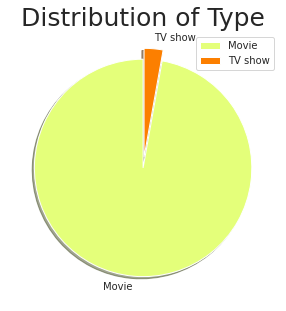

In [49]:
labels = ['Movie', 'TV show']
size = df['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (5,5)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

Text(0, 0.5, 'number of Movies added------>')

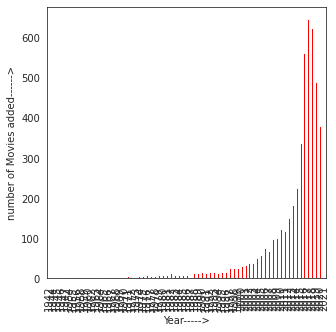

In [50]:
df.groupby(['release_year']).size().plot(kind='bar',color='r')
plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel('Year----->')
plt.ylabel('number of Movies added------>')

### Let's create some WordClouds!

In [51]:
# Importing WordCloud
from wordcloud import WordCloud

### 1.Let's see the Top Country

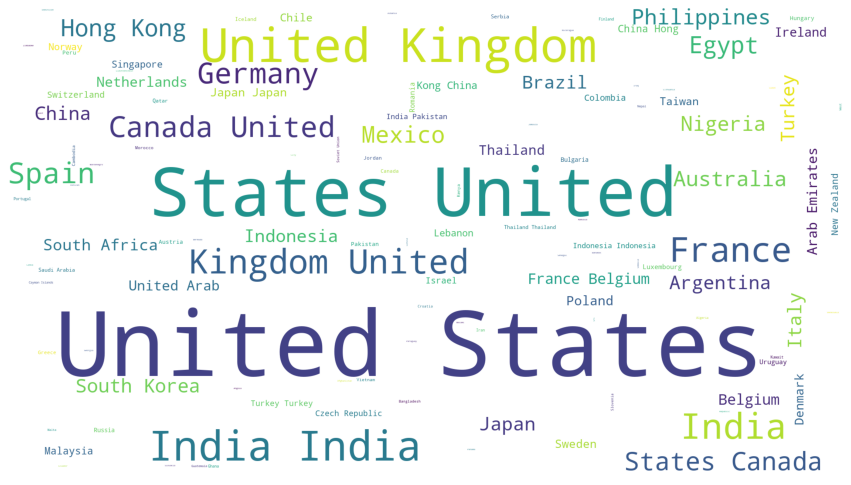

In [52]:
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

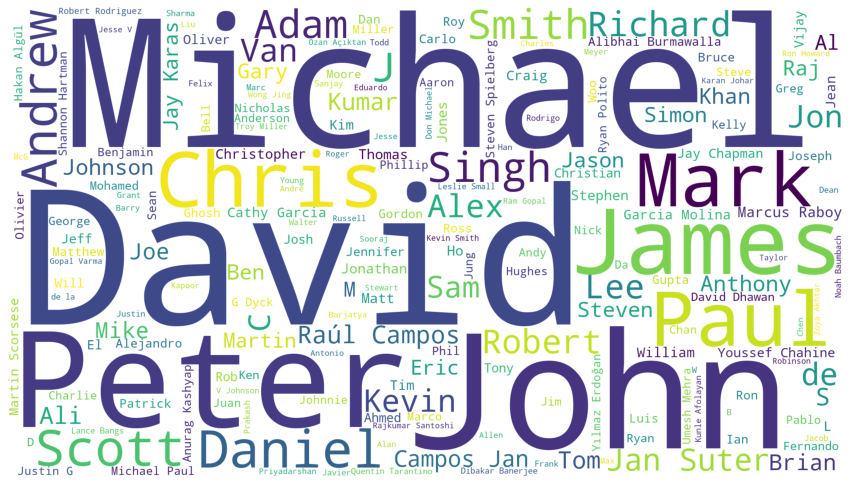

In [53]:
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()

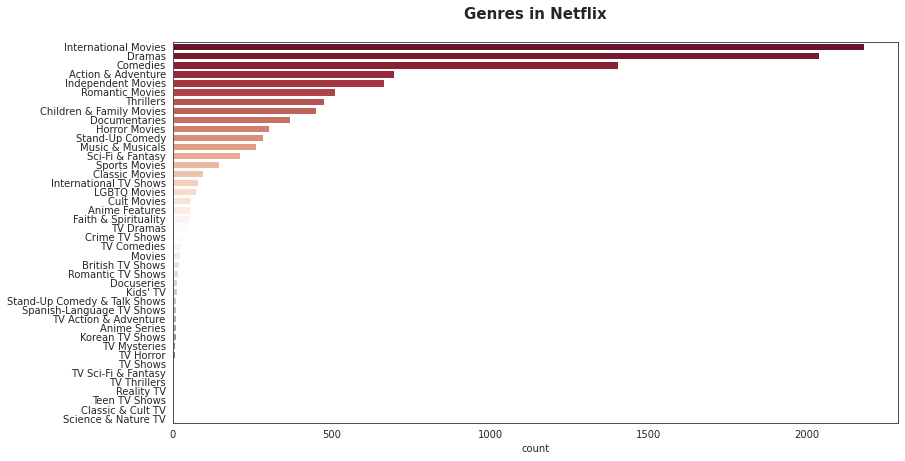

In [54]:
top_listed_genre = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
genre_movies=df[df.type == 'Movie']['genre']
genre_movies

plt.figure(figsize=(13,7))
plt.title('Genres in Netflix\n', fontsize=15, fontweight='bold')

sns.set_style(style='white')

sns.countplot(y = top_listed_genre, order=top_listed_genre.value_counts().index[:], palette='RdGy');

 ## Let's start Data modelling

In [55]:
# Load in the data from csv file
netflix = pd.read_csv('/content/drive/MyDrive/AlmaBetterCapstoneProjects/UnsupervisedML(Netflix Movies Clustering)/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
netflix_df = netflix.copy()

### Let's remove some un wanted columns which dont help us in any modelling.

In [56]:
netflix_df=netflix_df.drop(['show_id','date_added','release_year','duration'], axis=1)

## 1. Natural Language Processing

In [57]:
!pip install spacy
import spacy
import sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
# Load the large model to get the vectors
nlp = spacy.load('en_core_web_sm')

In [59]:
# Create word vectors for all movie and TV show descriptions
with nlp.disable_pipes():
    vectors = np.array([nlp(film.description).vector for idx, film in netflix_df.iterrows()])

In [60]:
# Function to analyze how similar two word vectors are
def cosine_similarity(a, b):
    return np.dot(a, b)/np.sqrt(a.dot(a)*b.dot(b))

In [61]:
# Calculate the mean for all word vectors
vec_mean = vectors.mean(axis=0)

# Subtract the mean from the vectors
centered = vectors - vec_mean 

In [62]:
# Function to get the indices of the five most similar descriptions
def get_similar_description_indices(description_vec):
    
    # Calculate similarities between given description and other descriptions in the dataset
    sims = np.array([cosine_similarity(description_vec - vec_mean, vec) for vec in centered])
    
    # Get the indices of the five most similar descriptions
    most_similar_index = np.argsort(sims)[-6:-1]
    
    return most_similar_index

In [63]:
# Create array of lists containing indices of five most similar descriptions
similar_indices = np.array([get_similar_description_indices(vec) for vec in vectors])

### Testing NLP Model

In [64]:
test_index = netflix.index[netflix.title == "Breaking Bad"][0]

print("Chosen Movie/TV Show")
print(netflix_df.title[test_index] + ': ' + netflix_df.description[test_index] + '\n')
print("Top Recommendations")
print(netflix_df.title[similar_indices[test_index][4]] + ': ' + netflix_df.description[similar_indices[test_index][4]] + '\n')
print(netflix_df.title[similar_indices[test_index][3]] + ': ' + netflix_df.description[similar_indices[test_index][3]] + '\n')
print(netflix_df.title[similar_indices[test_index][2]] + ': ' + netflix_df.description[similar_indices[test_index][2]] + '\n')
print(netflix_df.title[similar_indices[test_index][1]] + ': ' + netflix_df.description[similar_indices[test_index][1]] + '\n')
print(netflix_df.title[similar_indices[test_index][0]] + ': ' + netflix_df.description[similar_indices[test_index][0]] + '\n')

Chosen Movie/TV Show
Breaking Bad: A high school chemistry teacher dying of cancer teams with a former student to secure his family's future by manufacturing and selling crystal meth.

Top Recommendations
Pottersville: A man's drunken romp in a gorilla suit gets him mistaken for Bigfoot, drawing media attention and tourist dollars to his struggling small town.

Truckbhar Swapna: A taxi driver living in a Mumbai slum seeks to better his family's life by building an extension of his home while dealing with a lecherous contractor.

Warrior: A war veteran plagued by guilt over his final mission teams up with his best friend's widow to infiltrate a dangerous Copenhagen biker gang.

Spice Up: A spoiled young woman steps in to save her family’s restaurant with her cooking and tasting skills while balancing her complicated love life.

Arès: A futuristic France tries to keep its people from despair and rebellion over crippling poverty by engaging them with a violent TV competition show.



In [65]:
test_index = netflix.index[netflix.title == "6 Underground"][0]

print("Chosen Movie/TV Show")
print(netflix_df.title[test_index] + ': ' + netflix_df.description[test_index] + '\n')
print("Top Recommendations")
print(netflix_df.title[similar_indices[test_index][4]] + ': ' + netflix_df.description[similar_indices[test_index][4]] + '\n')
print(netflix_df.title[similar_indices[test_index][3]] + ': ' + netflix_df.description[similar_indices[test_index][3]] + '\n')
print(netflix_df.title[similar_indices[test_index][2]] + ': ' + netflix_df.description[similar_indices[test_index][2]] + '\n')
print(netflix_df.title[similar_indices[test_index][1]] + ': ' + netflix_df.description[similar_indices[test_index][1]] + '\n')
print(netflix_df.title[similar_indices[test_index][0]] + ': ' + netflix_df.description[similar_indices[test_index][0]] + '\n')

Chosen Movie/TV Show
6 Underground: After faking his death, a tech billionaire recruits a team of international operatives for a bold and bloody mission to take down a brutal dictator.

Top Recommendations
Into the Wild: A young man gives up everything – including his trust fund and ties to a seemingly stable family – to lead a solitary life in the wild.

Black Spot: A police chief and an eccentric new prosecutor investigate a string of grisly crimes and eerie phenomena in an isolated town at the edge of a forest.

Lost Bullet: Facing a murder charge, a genius mechanic with a criminal past must track down a missing car containing the proof of his innocence: a single bullet.

12 ROUND GUN: Dealing with personal demons and the death of his son, a prizefighter attempts a return to the ring by challenging his rival to a 12-round rematch.

We Are the Wave: A mysterious classmate leads four idealistic teens in a revolt against a rising tide of nationalistic fervor, but their movement takes a

## 2. K-means Clustering

### Data Cleaning

In [66]:
# Fill missing country entries with United States
netflix_df.fillna('Other', inplace=True)

# Change director, cast, country, and listed_in columns from type str to lists
netflix_df.director = netflix_df.director.str.split(', ').tolist()
netflix_df.cast = netflix_df.cast.str.split(', ').tolist()
netflix_df.country = netflix_df.country.str.split(', ').tolist()
netflix_df.listed_in = netflix_df.listed_in.str.split(', ').tolist()

### Feature Reduction

In [67]:
# Array of all unique directors, cast members, countries, ratings, and genres
all_directors = netflix_df['director'].explode().unique()
all_cast = netflix_df['cast'].explode().unique()
all_countries = netflix_df['country'].explode().unique()
all_ratings = netflix_df['rating'].unique()
all_genres = netflix_df['listed_in'].explode().unique()

len(all_directors), len(all_cast), len(all_countries), len(all_ratings),len(all_genres)

(4479, 32882, 122, 15, 42)

In [68]:
all_titles = netflix_df['title'].unique().tolist()
all_titles.sort()

In [69]:
# Retain primary director, lead actor/actress, and primary country
for inx in range(len(netflix_df)):
    netflix_df['director'][inx] = netflix_df['director'][inx][0]
    netflix_df['cast'][inx] = netflix_df['cast'][inx][0]
    netflix_df['country'][inx] = netflix_df['country'][inx][0]
    inx += 1

In [70]:
feature_reduced_df = netflix_df.copy()

### Feature Engineering (Categorical Encoding)

In [71]:
from sklearn.preprocessing import MultiLabelBinarizer

# Create the MultiLabelBinarizer 
mlb = MultiLabelBinarizer()

# Encode each genre and join to dataframe
mlb_df = feature_reduced_df.join(pd.DataFrame(mlb.fit_transform(feature_reduced_df.pop('listed_in')),
                                              columns=mlb.classes_,
                                              index=feature_reduced_df.index))

In [72]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to rating column
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_rating = pd.DataFrame(OH_encoder.fit_transform(mlb_df[['rating']]), columns=all_ratings)

# One-hot encoding removed index; put it back
OH_rating.index = mlb_df.index

# Add one-hot encoded columns to data frame
mlb_df = mlb_df.join(OH_rating)

In [73]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.3 MB/s 


In [74]:
import category_encoders as ce

# Create the count encoder
count_enc = ce.CountEncoder()

# Count encode director, cast, and country columns
count_encoded = count_enc.fit_transform(mlb_df[['director','cast','country']])

# Rename the columns with the _count suffix, and join to dataframe
netflix_encoded_df = mlb_df.join(count_encoded.add_suffix("_count"))

In [75]:
netflix_encoded_df = netflix_encoded_df.drop(['type','title','director','cast','country','rating','description'], axis=1)
netflix_encoded_df.head()

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,Other,TV-Y7,PG,G,NC-17,TV-Y7-FV,UR,director_count,cast_count,country_count
0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2389,1,79
1,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2,123
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,28
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,2882
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,2882


### Create (K-Means) Clusters

In [76]:
from sklearn.cluster import KMeans

# Create K-Means Model
modelkmeans = KMeans(n_clusters=500, init='k-means++', n_init=10).fit(netflix_encoded_df)

# Form cluster predictions using K-Means Model
predictions = modelkmeans.predict(netflix_encoded_df)

# Convert cluster predictions to data frame
predictions_df = pd.DataFrame(predictions, columns=['cluster'])

# Attach cluster predictions to original data frame
netflix_pred = netflix.copy()
netflix_pred.insert(len(netflix.columns), column = 'cluster', value = predictions_df.cluster)

In [77]:
netflix_pred.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,134
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,495
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",480
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",404
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,434


### Test K-Means Clustering Model

In [78]:
# Get cluster number from given movie or TV show
cluster_num = netflix_pred[netflix_pred.title=='Breaking Bad'].cluster.item()

# View cluster the movie or TV show belongs to
netflix[netflix_pred.cluster == cluster_num]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
63,s64,TV Show,13 Reasons Why,NaN,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,"June 5, 2020",2020,TV-MA,4 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries","After a teenage girl's perplexing suicide, a c..."
64,s65,TV Show,13 Reasons Why: Beyond the Reasons,NaN,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,"August 23, 2019",2019,TV-MA,3 Seasons,"Crime TV Shows, Docuseries","Cast members, writers, producers and mental he..."
543,s544,TV Show,Another Life,NaN,"Katee Sackhoff, Justin Chatwin, Samuel Anderso...",United States,"July 25, 2019",2019,TV-MA,1 Season,"TV Action & Adventure, TV Dramas, TV Mysteries","After a massive alien artifact lands on Earth,..."
565,s566,TV Show,Aquarius,NaN,"David Duchovny, Gethin Anthony, Grey Damon, Em...",United States,"June 16, 2017",2016,TV-MA,2 Seasons,"Crime TV Shows, TV Dramas","Amid the turmoil of 1960s LA, two cops and a p..."
761,s762,TV Show,Bates Motel,NaN,"Vera Farmiga, Freddie Highmore, Max Thieriot, ...",United States,"February 20, 2018",2017,TV-MA,5 Seasons,"Crime TV Shows, TV Dramas, TV Horror","When his father dies, Norman Bates and his mot..."
858,s859,TV Show,Better Call Saul,NaN,"Bob Odenkirk, Jonathan Banks, Michael McKean, ...",United States,"February 9, 2020",2018,TV-MA,4 Seasons,"Crime TV Shows, TV Comedies, TV Dramas","This Emmy-nominated prequel to ""Breaking Bad"" ..."
1089,s1090,TV Show,Breaking Bad,NaN,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,"August 2, 2013",2013,TV-MA,5 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...
1584,s1585,TV Show,Damnation,NaN,"Logan Marshall-Green, Killian Scott, Sarah Jon...",United States,"November 7, 2018",2017,TV-MA,1 Season,"Crime TV Shows, TV Dramas","During the Great Depression, a stranger with a..."
1608,s1609,TV Show,Dare Me,NaN,"Willa Fitzgerald, Herizen Guardiola, Marlo Kel...",United States,"December 30, 2020",2019,TV-MA,1 Season,"Crime TV Shows, TV Dramas, TV Thrillers",Relationships topple and loyalties flip when a...
1731,s1732,TV Show,Dexter,NaN,"Michael C. Hall, Jennifer Carpenter, David Zay...",United States,"January 1, 2018",2013,TV-MA,8 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries","By day, mild-mannered Dexter is a blood-spatte..."


In [79]:
# Get cluster number from given movie or TV show
cluster_num = netflix_pred[netflix_pred.title=='6 Underground'].cluster.item()

# View cluster the movie or TV show belongs to
netflix[netflix_pred.cluster == cluster_num]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
127,s128,Movie,6 Underground,Michael Bay,"Ryan Reynolds, Mélanie Laurent, Corey Hawkins,...",United States,"December 13, 2019",2019,R,129 min,"Action & Adventure, Dramas","After faking his death, a tech billionaire rec..."
431,s432,Movie,Along Came a Spider,Lee Tamahori,"Morgan Freeman, Monica Potter, Michael Wincott...","United States, Germany, Canada","October 1, 2019",2001,R,103 min,Thrillers,When a girl is kidnapped from a prestigious pr...
1578,s1579,Movie,Daddy Day Care,Steve Carr,"Eddie Murphy, Jeff Garlin, Steve Zahn, Regina ...",United States,"January 1, 2019",2003,PG,93 min,"Children & Family Movies, Comedies",When a conscientious father loses his lucrativ...
2097,s2098,Movie,Fallen,Gregory Hoblit,"Denzel Washington, John Goodman, Donald Suther...",United States,"November 1, 2019",1998,R,124 min,Thrillers,A tough homicide cop faces his most dangerous ...
2355,s2356,Movie,Garfield Gets Real,"Mark A.Z. Dippé, Kyung Ho Lee","Frank Welker, Wally Wingert, Gregg Berger, Jen...",United States,"January 1, 2020",2007,TV-Y,78 min,"Children & Family Movies, Comedies","After trying to live in the ""real world"" and c..."
2356,s2357,Movie,Garfield's Fun Fest,"Mark A.Z. Dippé, Eondeok Han","Frank Welker, Tim Conway, Gregg Berger, Wally ...","United States, South Korea","January 1, 2020",2008,TV-Y7,79 min,"Children & Family Movies, Comedies",Garfield has long been the champ at a yearly c...
3424,s3425,Movie,Knock Knock,Eli Roth,"Keanu Reeves, Lorenza Izzo, Ana de Armas, Aaro...","United States, Chile, Israel","November 1, 2020",2015,R,99 min,"Horror Movies, Thrillers",A devoted husband and father on his own for th...
4190,s4191,Movie,Monster High: Friday Night Frights,Dustin McKenzie,"Laura Bailey, Ogie Banks, Cam Clarke, Debi Der...",United States,"January 1, 2018",2013,TV-Y7,46 min,Children & Family Movies,In their bid to win the Skulltimate Roller Maz...
4197,s4198,Movie,"Monster High: Scaris, City of Frights","Dustin McKenzie, Andrew Duncan, Audu Paden","Laura Bailey, Cam Clarke, Erin Fitzgerald, Dee...",United States,"July 7, 2015",2013,TV-G,60 min,Children & Family Movies,When Clawdeen gets a chance to study with a to...
4198,s4199,Movie,Monster High: Why Do Ghouls Fall in Love?,"Dustin McKenzie, Steve Sacks","Laura Bailey, Ogie Banks, Cam Clarke, Debi Der...",United States,"January 1, 2018",2013,TV-Y7,46 min,Children & Family Movies,Draculaura's ghoulfriends have some suspicions...
